# Faktor Apakah yang Menjual Sebuah Mobil?

Anda adalah seorang analis di Crankshaft List. Ratusan iklan kendaraan gratis ditayangkan di situs web Anda setiap hari. Anda perlu mempelajari kumpulan data selama beberapa tahun terakhir dan menentukan faktor-faktor yang memengaruhi harga sebuah kendaraan.

## Tujuan

Proyek ini befokus pada Exploratory Data Analysis(EDA) dan Data Visualization. Analisis yang dilakukan yaitu menentukan hubungan antara harga sebuah mobil dengan usia, jarak tempuh, kondisi, tipe transmisi, dan warnanya. Selanjutnya ditentukan faktor yang paling memengaruhi harga kendaraan. Data dianalisis menggunakan teknik statistik atau alat visualisasi untuk mengidentifikasi pola atau tren serta untuk mengungkap insights dalam data.

### Hipotesis

1. Mobil yang memiliki usia yang lebih tua memiliki harga mobil yang lebih murah.
2. Jarak tempuh mobil yang lebih kecil memiliki harga mobil yang lebih murah.
3. Mobil dengan kondisi yang bagus memiliki harga mobil yang lebih mahal.
4. Tipe transmisi mobil matic lebih mahal daripadi tipe transisi mobil manual.
5. Warna-warna yang tidak umum, seperti kuning, hijau, biru, merah, cenderung kurang peminat. Ini menjadikan dari segi harga tidak sebaik warna hitam, putih atau silver.

### Tahapan

Data tentang spesifikasi mobil disimpan dalam file `/datasets/vehicles_us.csv`. Tidak ada informasi terkait kualitas data tersebut, jadi perlu dilakukan pemeriksaan terlebih dahulu sebelum menguji hipotesis.

Proyek ini terdiri dari dua tahap:

1. Pra-pemrosesan Data
2. Analisis Data Exploratif (EDA)


## 1. Pra-pemrosesan

**Import *library* yang dibutuhkan:**

In [1]:
# Import library
import pandas as pd
import matplotlib.pyplot as plt

### 1.1. Memuat Data

In [2]:
# Try and except datasets
try:
    data = pd.read_csv('vehicles_us.csv')
except:
    data = pd.read_csv('/datasets/vehicles_us.csv') 

data

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013.0,nissan maxima,like new,6.0,gas,88136.0,automatic,sedan,black,NaN,2018-10-03,37
51521,2700,2002.0,honda civic,salvage,4.0,gas,181500.0,automatic,sedan,white,NaN,2018-11-14,22
51522,3950,2009.0,hyundai sonata,excellent,4.0,gas,128000.0,automatic,sedan,blue,NaN,2018-11-15,32
51523,7455,2013.0,toyota corolla,good,4.0,gas,139573.0,automatic,sedan,black,NaN,2018-07-02,71


### 1.2. Mengeksplorasi Data Awal

**Deskripsi Data**: 


- `price` — harga mobil
- `model_year` — tahun produksi mobil
- `model` — merk dan seri mobil
- `condition`  — kondisi mobil
- `cylinders` — jumlah silinder mesin mobil
- `fuel` — gas, disel, dan lain-lain.
- `odometer` — jarak tempuh kendaraan saat iklan ditayangkan  
- `transmission` — tipe transisi mobil
- `type` — tipe mobil
- `paint_color` — warna mobil
- `is_4wd` — apakah kendaraan memiliki penggerak 4 roda (tipe Boolean)
- `date_posted` — tanggal iklan ditayangkan 
- `days_listed` — jumlah hari iklan ditayangkan hingga dihapus 

In [3]:
# Check data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [4]:
# Check first 10 data
data.head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,NaN,2018-12-27,73
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17


In [5]:
# Check 10 sample data
data.sample(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
4568,10650,2015.0,chevrolet malibu,excellent,4.0,gas,NaN,automatic,sedan,silver,NaN,2018-12-05,21
40148,14000,2013.0,toyota sienna,excellent,6.0,gas,95000.0,automatic,mini-van,silver,NaN,2018-12-12,53
8604,14000,2009.0,ram 1500,good,8.0,gas,113000.0,automatic,truck,black,1.0,2018-08-25,33
37596,8500,2017.0,ford fusion,excellent,4.0,gas,93200.0,automatic,sedan,NaN,NaN,2019-04-01,121
17565,1500,2012.0,ford econoline,good,8.0,gas,210996.0,automatic,van,white,NaN,2019-04-08,12
27437,1000,2003.0,ford ranger,fair,6.0,gas,147000.0,automatic,pickup,NaN,NaN,2018-06-01,24
16910,18995,2012.0,toyota tundra,excellent,8.0,gas,84679.0,automatic,pickup,NaN,1.0,2019-02-23,12
33270,9997,2012.0,jeep grand cherokee,excellent,6.0,gas,151204.0,automatic,SUV,black,1.0,2018-09-20,18
28986,64493,2018.0,chevrolet silverado 3500hd,new,8.0,diesel,7.0,automatic,truck,NaN,1.0,2018-12-19,4
15610,8500,NaN,honda accord,good,4.0,gas,132.0,automatic,sedan,black,NaN,2019-02-12,53


**Kesimpulan sementara:**

* Dari 10 data pertama, terlihat ada beberapa nilai yang hilang. 
* Kolom `model_year` akan terlihat lebih rapih apabila menggunakan integer.
* Kolom `condition` terlihat lebih rapih apabila nilai string diganti dengan skala numerik.
* Kolom `date_posted` sebaiknya menggunakan format dtype datetime64.

In [6]:
# Check total missing values descending
data.isna().sum().sort_values(ascending=False)

is_4wd          25953
paint_color      9267
odometer         7892
cylinders        5260
model_year       3619
price               0
model               0
condition           0
fuel                0
transmission        0
type                0
date_posted         0
days_listed         0
dtype: int64

In [7]:
# Check unique data from 'transmisson' and 'type' column
print(data['transmission'].unique())
print(data['type'].unique())

['automatic' 'manual' 'other']
['SUV' 'pickup' 'sedan' 'truck' 'coupe' 'van' 'convertible' 'hatchback'
 'wagon' 'mini-van' 'other' 'offroad' 'bus']


In [8]:
# Check duplicated data
data.duplicated().sum()

0

**Kesimpulan sementara:**

* Kolom `model_year`, `cylinders`, `odometer`, `paint_color`, dan  `is_4wd` terdapat nilai hilang yang perlu dianalisis.
* Kolom `transmission` dan `type` terdapat nilai other yang merupakan anomali sehingga perlu dianalisis lebih dalam.
* Dataset tidak memiliki duplikat pada datanya.


In [9]:
# Calculating some statistical data 
data.describe()

,price,model_year,cylinders,odometer,is_4wd,days_listed
count,51525.000000,47906.000000,46265.000000,43633.000000,25572.0,51525.00000
mean,12132.464920,2009.750470,6.125235,115553.461738,1.0,39.55476
std,10040.803015,6.282065,1.660360,65094.611341,0.0,28.20427
min,1.000000,1908.000000,3.000000,0.000000,1.0,0.00000
25%,5000.000000,2006.000000,4.000000,70000.000000,1.0,19.00000
50%,9000.000000,2011.000000,6.000000,113000.000000,1.0,33.00000
75%,16839.000000,2014.000000,8.000000,155000.000000,1.0,53.00000
max,375000.000000,2019.000000,12.000000,990000.000000,1.0,271.00000


**Kesimpulan sementara:**

* Kolom `price` terdapat nilai yang tidak wajar, yaitu min price adalah 1.000000 sehingga perlu dianalisis.
* Kolom `transmission` dan `type` terdapat nilai other yang merupakan anomali sehingga perlu dianalisis lebih dalam.
* Dataset tidak memiliki duplikat pada datanya.


### Kesimpulan dan Langkah-Langkah Selanjutnya

#### **Nilai yang Hilang**

Setiap baris dalam tabel menyimpan data terkait harga sebuah mobil yang telah terjual. Sejumlah kolom menyimpan data yang mendeskripsikan mobil itu sendiri: tahun produksi, merk mobil, kondisi mobil, silinder mesin, tipe gas, jarak tembuh mobil, tipe transisi, tipe mobil, warna mobil, dan tipe kendaraan yang memiliki penggerak 4 roda. Sisanya menyimpan data terkait informasi mobil terjual: tanggal iklan ditayangkan serta hari iklan ditayangkan hingga dihapus.

Jelas bahwa data yang kita miliki cukup untuk menguji hipotesis. Meski demikian, kita memiliki nilai-nilai yang hilang.

* Nilai yang hilang dalam kolom `cylinders` dan `is_4wd` tidak begitu penting karena nilai yang hilang tersebut tidak berpengaruh terhadap penelitian. Cukup menggantinya dengan penanda yang jelas. 
* Nilai yang hilang dalam kolom `model_year`, `odometer`, dan `paint_color` dapat memengaruhi perbandingan harga sebuah kendaraan. Oleh sebab itu perlu dilakukan evaluasi mengenai seberapa besar nilai yang hilang dapat memengaruhi perhitungan.

Alasan mengapa data tersebut hilang sangatlah berguna untuk mempelajari dan mencoba memperbaikinya namun sayangnya, kita belum memiliki kesempatan tersebut dalam proyek ini.

#### **Gaya Penulisan**

Setelah mengatasi nilai-nilai yang hilang, langkah selanjutnya yaitu merapihkan data:

* Mengubah nilai pada kolom `model_year` menjadi integer.
* Mengganti nilai pada kolom `condition` menjadi skala numerik.
* Mengubah format dtype pada kolom `date_posted` menjadi format datetime64.
* Akan lebih baik apabila terdapat data tentang hari dalam minggu, bulan, dan tahun iklan ditayangkan.
* Menambahkan kolom baru tentang usia kendaraan (dalam tahun) ketika iklan ditayangkan dan jarak tempuh rata-rata kendaraan per tahun.

#### **Duplikat**

Selanjutnya memeriksa duplikat pada data. Namun, pada dataset ini tidak memiliki data duplikat pada data. Sehingga tidak perlu dilakukan analisis duplikat awal.

#### **Anomali Data**

Setelah memeriksa data duplikat perlu memepertimbangkan data anomali berikut, karena data tersebut mempengaruhi analisis penelitian.

* Pada kolom `price` terdapat nilai harga mobil yang tidak wajar, yaitu 1.000000.
* Pada kolom `transmission` dan `type` terdapat nilai **other** yang seharusnya diketahui karena merupakan data yang mendeskripsikan mobil itu sendiri.

### 1.3. Mengatasi Nilai-Nilai yang Hilang

In [10]:
# Check total missing values descending
data.isna().sum().sort_values(ascending=False)

is_4wd          25953
paint_color      9267
odometer         7892
cylinders        5260
model_year       3619
price               0
model               0
condition           0
fuel                0
transmission        0
type                0
date_posted         0
days_listed         0
dtype: int64

**Langkah pertama** dalam menangani nilai-nilai yang hilang yaitu menghitung persentasenya serta dibandingkan dengan keseluruhan data untuk mengetahui dampak dari nilai-nilai yang hilang tersebut terhadap dataset.

In [11]:
# Loop for checking the percentage of missing values per total values each column
for col in data.columns:
    missing = data[col].isnull().sum()
    total = data[col].shape[0]
    percent = (missing/total) * 100
    print(f"Kolom {col}: {percent:.2f}% nilai yang hilang.")

Kolom price: 0.00% nilai yang hilang.
Kolom model_year: 7.02% nilai yang hilang.
Kolom model: 0.00% nilai yang hilang.
Kolom condition: 0.00% nilai yang hilang.
Kolom cylinders: 10.21% nilai yang hilang.
Kolom fuel: 0.00% nilai yang hilang.
Kolom odometer: 15.32% nilai yang hilang.
Kolom transmission: 0.00% nilai yang hilang.
Kolom type: 0.00% nilai yang hilang.
Kolom paint_color: 17.99% nilai yang hilang.
Kolom is_4wd: 50.37% nilai yang hilang.
Kolom date_posted: 0.00% nilai yang hilang.
Kolom days_listed: 0.00% nilai yang hilang.


**Kesimpulan sementara:**

* Persentase data yang hilang pada pada kolom `is_4wd` yaitu 50.37%.
* Persentase data yang hilang pada pada kolom `paint_color` yaitu 17.99%. 
* Persentase data yang hilang pada pada kolom `odometer` yaitu 15.32%.
* Persentase data yang hilang pada pada kolom `cylinders` yaitu 10.21%.
* Persentase data yang hilang pada pada kolom `model_year` yaitu 7.02%.

Dalam beberapa situasi, nilai yang hilang jika bagiannya tidak banyak (katakanlah, 5-10%), nilai tersebut dapat dihapus.


**Langkah kedua** dalam menangani nilai-nilai yang hilang yaitu menentukan nilai yang hilang termasuk dalam variabel kategoris atau kuantitatif.

In [12]:
# Function for finding variable type each column
def find_missing_variable_type(data):
    
    missing_variable_type = {}
    
    for col in data.columns:
        unique_values = data[col].nunique()
        
        # If there are less than 400 unique values, assume the column is categorical
        if unique_values < 400:
            missing_variable_type[col] = "kategoris"
        # Otherwise, assume the column is quantitative
        else:
            missing_variable_type[col] = "kuantitatif"
    
    return missing_variable_type

In [13]:
missing_variable_type = find_missing_variable_type(data)
print(missing_variable_type)

{'price': 'kuantitatif', 'model_year': 'kategoris', 'model': 'kategoris', 'condition': 'kategoris', 'cylinders': 'kategoris', 'fuel': 'kategoris', 'odometer': 'kuantitatif', 'transmission': 'kategoris', 'type': 'kategoris', 'paint_color': 'kategoris', 'is_4wd': 'kategoris', 'date_posted': 'kategoris', 'days_listed': 'kategoris'}


**Kesimpulan sementara:**

* Kolom `is_4wd` memiliki nilai hilang yang termasuk variabel katagoris.
* Kolom `paint_color` memiliki nilai hilang yang termasuk variabel kategoris. 
* Kolom `odometer` memiliki nilai hilang yang termasuk variabel kuantitatif.
* Kolom `cylinders` memiliki nilai hilang yang termasuk variabel katagoris.
* Kolom `model_year` memiliki nilai hilang yang termasuk variabel katagoris.

**Langkah ketiga** dalam menangani nilai-nilai yang hilang yaitu:


1. Jika kategoris maka ditentukan apakah nilai yang hilang memiliki suatu pola. 
* Jika nilainya tidak terdapat pola, nilai tersebut dapat diganti dengan nilai default, seperti string kosong atau kata tertentu. 
* Jika berpola, maka perlu analisis lebih lanjut.


2. Jika kuantitatif maka ditentukan apakah data memiliki outlier yang signifikan.
* Jika tidak terdapat outlier yang signifikan, nilai tersebut dapat dihitung rata-rata data pada kolom atau seluruh dataset.
* Jika data memiliki oulier yang signifikan, nilai tersebut dapat dihitung median data pada kolom atau seluruh dataset.

In [14]:
# Function for checking missing pattern
def check_missing_pattern(data):
    
    missing_pattern = {}
    
    for col in data.columns:
        # Create a boolean mask to identify missing values
        mask = data[col].isnull()
        # Get sum of missing values
        missing = data[col].isnull().sum()
        
        # If there are no missing values, the pattern is "none"
        if missing == 0:
            missing_pattern[col] = "none"
        # If there is a missing value, check if there is a pattern
        else:
            # Create a boolean mask to identify non-missing values
            mask_not_missing = ~mask
            # Count the number of unique values in a column
            unique_values = data[col].nunique()
            # If there are fewer unique values than missing values, the pattern is "random"
            if unique_values < missing:
                missing_pattern[col] = "random"
            # Otherwise, the pattern is "pattern"
            else:
                missing_pattern[col] = "pattern"
    
    return missing_pattern


In [15]:
# Check the missing pattern
missing_pattern = check_missing_pattern(data)
print(missing_pattern)

{'price': 'none', 'model_year': 'random', 'model': 'none', 'condition': 'none', 'cylinders': 'random', 'fuel': 'none', 'odometer': 'pattern', 'transmission': 'none', 'type': 'none', 'paint_color': 'random', 'is_4wd': 'random', 'date_posted': 'none', 'days_listed': 'none'}


**Kesimpulan sementara:**

* Kolom `is_4wd` memiliki nilai hilang yang tidak berpola.
* Kolom `paint_color` memiliki nilai tidak berpola. 
* Kolom `odometer` memiliki nilai hilang yang berpola.
* Kolom `cylinders` memiliki nilai hilang yang tidak berpola.
* Kolom `model_year` memiliki nilai hilang yang tidak berpola.

**Kolom `is_4wd`** memiliki nilai hilang sebesar 50.37% dengan variabel katagoris dan tidak berpola. Maka nilai hilang tersebut dapat diisi dengan nilai yang lainnya, yaitu 1.0.

In [16]:
# Filling the missing values with fillna()
data['is_4wd'] = data['is_4wd'].fillna(1.0)

**Kolom `paint_color`** memiliki nilai hilang sebesar 17.99% dengan variabel katagoris dan tidak berpola. Maka nilai hilang tersebut dapat diisi dengan nilai yang lainnya, 'unknown'.

In [17]:
# Filling the missing values with fillna()
data['paint_color'] = data['paint_color'].fillna('unknown')

**Kolom `odometer`** memiliki nilai hilang sebesar 15.32% dengan variabel kuantitatif. Maka nilai hilang tersebut ditentukan terlebih dahulu outliernya.

**Kolom `cylinders`** memiliki nilai hilang sebesar 10.21% dengan variabel katagoris dan tidak berpola. Maka nilai hilang tersebut dapat diisi dengan nilai yang lainnya, yaitu 0.0

In [18]:
# Filling the missing values with fillna()
data['cylinders'] = data['cylinders'].fillna(0.0)

**Kolom `model_year`** memiliki nilai hilang sebesar 7.02% dengan variabel variabel katagoris dan tidak berpola. Maka nilai hilang tersebut dapat diisi dengan nilai yang lainnya. Namun karena kolom ini akan mempengaruhi penelitan, maka nilai hilang akan diisi dengan median. 

In [19]:
# Check the missing values descending
data.isna().sum().sort_values(ascending=False)

odometer        7892
model_year      3619
price              0
model              0
condition          0
cylinders          0
fuel               0
transmission       0
type               0
paint_color        0
is_4wd             0
date_posted        0
days_listed        0
dtype: int64

Nilai hilang pada tiap kolom sementara diisi dengan median untuk mempermudah riset penelitan. Hipotesis awal adalah nilai tersebut memiliki outlier yang signifikan. Data dibuat baru agar tidak mempengaruhi data awal.

In [20]:
# Create new dataset
data_new = data.copy()

# Function for filling missing values with median
def fill_missing_value (dataframe, agg_column, value_column):
    
    # Calculates the median value for each group in the aggregation column
    grouped_values = dataframe.groupby(agg_column)[value_column].median().reset_index()
    
    # Fill in the missing values in the column with the median value calculated for each group
    dataframe[value_column] = dataframe[value_column].fillna(dataframe[agg_column].map(grouped_values.set_index(agg_column)[value_column]))
    
    return dataframe

In [21]:
# Fill in the missing values in the odometer column
data_new = fill_missing_value(data_new, 'condition', 'odometer')

# Fill in the missing values in the model_year column
data_new = fill_missing_value(data_new, 'model', 'model_year') 


In [22]:
# Check the missing values
data_new.isna().sum()

price           0
model_year      0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
transmission    0
type            0
paint_color     0
is_4wd          0
date_posted     0
days_listed     0
dtype: int64

### 1.4. Memperbaiki Tipe Data

Data pada kolom `model_year` diubah menjadi integer.

In [23]:
# Change the model_year type to integer
data_new['model_year'] = data_new['model_year'].astype(int)

Data pada kolom `condition` diubah menjadi skala numerik.

In [24]:
# Function to change the condition values into numeric scale
def conditions(scale):   
    if scale == 'new':
        return 5
    if scale == 'like new':
        return 4
    if scale == 'excellent':
        return 3
    if scale == 'good':
        return 2
    if scale == 'fair':
        return 1
    else:
        return 0
    return 'Unidentified' 

In [25]:
# Apply the function
data_new['condition'] = data_new['condition'].apply(conditions)
data_new['condition'].value_counts()

3    24773
2    20145
4     4742
1     1607
5      143
0      115
Name: condition, dtype: int64

Data pada kolom `date_posted` diubah formatnya menjadi format datetime64.

In [26]:
# Change date_posted format to datetime64
data_new['date_posted'] = pd.to_datetime(data_new['date_posted'], format='%Y-%m-%d')
data_new['date_posted'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 51525 entries, 0 to 51524
Series name: date_posted
Non-Null Count  Dtype         
--------------  -----         
51525 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 402.7 KB


### 1.5. Memperbaiki Kualitas Data

Menambahkan kolom hari dalam minggu, bulan, dan tahun iklan ditayangkan.

In [27]:
# Add day_of_week, month, and year column
data_new['day_of_week'] = data_new['date_posted'].dt.day_name()
data_new['month'] = data_new['date_posted'].dt.month_name()
data_new['year'] = data_new['date_posted'].dt.year

Menambahkan kolom usia kendaraan (dalam tahun) ketika iklan ditayangkan.

In [28]:
# Add car_age column
data_new['car_age'] = data_new['year'] - data_new['model_year']

Menambahkan kolom jarak tempuh rata-rata kendaraan per tahun.

In [29]:
# Add avg_mileage column
data_new['avg_mileage'] = data_new['odometer'] / data_new['car_age'].mean()

## 2. Analisis Data Exploratif (EDA)

### 2.1. Memeriksa Data yang Sudah Bersih

In [30]:
# Check general data_new info
data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         51525 non-null  int64         
 1   model_year    51525 non-null  int32         
 2   model         51525 non-null  object        
 3   condition     51525 non-null  int64         
 4   cylinders     51525 non-null  float64       
 5   fuel          51525 non-null  object        
 6   odometer      51525 non-null  float64       
 7   transmission  51525 non-null  object        
 8   type          51525 non-null  object        
 9   paint_color   51525 non-null  object        
 10  is_4wd        51525 non-null  float64       
 11  date_posted   51525 non-null  datetime64[ns]
 12  days_listed   51525 non-null  int64         
 13  day_of_week   51525 non-null  object        
 14  month         51525 non-null  object        
 15  year          51525 non-null  int64 

In [31]:
# Check 10 sample
data_new.sample(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,day_of_week,month,year,car_age,avg_mileage
11089,37000,2018,chevrolet silverado 1500 crew,2,8.0,gas,30465.0,other,pickup,white,1.0,2018-12-12,53,Wednesday,December,2018,0,3578.263662
9810,4800,2012,ford fusion se,3,4.0,gas,68994.0,automatic,sedan,unknown,1.0,2019-04-12,30,Friday,April,2019,7,8103.683673
37125,23500,2015,chevrolet silverado 1500,4,8.0,gas,98500.0,automatic,truck,unknown,1.0,2019-01-13,13,Sunday,January,2019,4,11569.308082
19292,19900,2010,chevrolet silverado 1500,3,8.0,gas,68000.0,automatic,pickup,blue,1.0,2018-10-22,112,Monday,October,2018,8,7986.933498
14688,5995,2010,ford fusion,3,4.0,gas,110975.0,manual,sedan,blue,1.0,2018-07-07,67,Saturday,July,2018,8,13034.558014
832,29399,2015,ram 1500,3,8.0,gas,73354.0,automatic,pickup,grey,1.0,2018-07-26,37,Thursday,July,2018,3,8615.787056
16119,24600,2014,chevrolet silverado 1500 crew,2,6.0,gas,85048.0,automatic,pickup,unknown,1.0,2019-01-30,15,Wednesday,January,2019,5,9989.304708
34482,1000,1996,nissan maxima,2,6.0,gas,168000.0,automatic,sedan,white,1.0,2018-10-28,42,Sunday,October,2018,22,19732.423936
38547,13995,2013,buick enclave,3,6.0,gas,80000.0,automatic,SUV,silver,1.0,2018-06-28,14,Thursday,June,2018,5,9396.392351
44265,6800,2007,hyundai sonata,3,6.0,gas,56845.0,automatic,sedan,silver,1.0,2018-06-15,10,Friday,June,2018,11,6676.724040


In [32]:
# Calculating some statistical data
data_new.describe()

,price,model_year,condition,cylinders,odometer,is_4wd,days_listed,year,car_age,avg_mileage
count,51525.000000,51525.000000,51525.000000,51525.000000,51525.000000,51525.0,51525.00000,51525.000000,51525.000000,51525.000000
mean,12132.464920,2009.793557,2.637535,5.499932,115199.014508,1.0,39.55476,2018.307462,8.513906,13530.689234
std,10040.803015,6.099381,0.712447,2.431985,60484.863376,0.0,28.20427,0.461447,6.112976,7104.243844
min,1.000000,1908.000000,0.000000,0.000000,0.000000,1.0,0.00000,2018.000000,0.000000,0.000000
25%,5000.000000,2007.000000,2.000000,4.000000,75668.000000,1.0,19.00000,2018.000000,4.000000,8887.577705
50%,9000.000000,2011.000000,3.000000,6.000000,110908.000000,1.0,33.00000,2018.000000,8.000000,13026.688535
75%,16839.000000,2014.000000,3.000000,8.000000,147821.000000,1.0,53.00000,2019.000000,12.000000,17362.301421
max,375000.000000,2019.000000,5.000000,12.000000,990000.000000,1.0,271.00000,2019.000000,110.000000,116280.355340


### 2.2. Mempelajari Parameter Inti 

Untuk mempelajari outlier memengaruhi bentuk dan kemudahan pembacaan analisis, dilakukan pendekatan kepada beberapa parameter berikut:

- Harga,
- Usia kendaraan ketika iklan ditayangkan,
- Jarak tempuh,
- Kondisi, dan
- Jumlah silinder 

In [33]:
# Calculating some statistical data
data_new[['price', 'car_age', 'avg_mileage', 'condition', 'cylinders']].describe()

,price,car_age,avg_mileage,condition,cylinders
count,51525.000000,51525.000000,51525.000000,51525.000000,51525.000000
mean,12132.464920,8.513906,13530.689234,2.637535,5.499932
std,10040.803015,6.112976,7104.243844,0.712447,2.431985
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,5000.000000,4.000000,8887.577705,2.000000,4.000000
50%,9000.000000,8.000000,13026.688535,3.000000,6.000000
75%,16839.000000,12.000000,17362.301421,3.000000,8.000000
max,375000.000000,110.000000,116280.355340,5.000000,12.000000


Berikut beberapa pertanyaan-pertanyaan dasar untuk memeriksa keakuratan data:

* Berapa jumlah mobil terjual yang tercatat dalam data?
* Berapa banyak model yang diamati?
* Berapa jumlah mobil yang terjual per harinya?
* Model mobil mana yang paling populer?
* Pada hari apa mobil paling banyak terjual?

In [34]:
# Ansewering basic question
print('Jawaban pertanyaan dasar tersebut yaitu:')
total_car_sold = data_new.shape[0]
print('Jumlah mobil terjual:', total_car_sold)
total_model_car = len(data_new['model'].unique())
print('Jumlah model mobil:', total_model_car)
print('Rentang tanggal data diambil:', data_new['date_posted'].min(),'hingga', data['date_posted'].max())
total_days = 7 # simpan jumlah hari observasi
car_sold_per_day =  total_car_sold/total_model_car/total_days
print('Jumlah mobil terjual per hari:', car_sold_per_day)
print('Mobil paling populer yaitu:',data_new['model'].value_counts().head(2))
print('Hari paling ramai yaitu:', data_new['day_of_week'].value_counts().head(1))

Jawaban pertanyaan dasar tersebut yaitu:
Jumlah mobil terjual: 51525
Jumlah model mobil: 100
Rentang tanggal data diambil: 2018-05-01 00:00:00 hingga 2019-04-19
Jumlah mobil terjual per hari: 73.60714285714286
Mobil paling populer yaitu: ford f-150                  2796
chevrolet silverado 1500    2171
Name: model, dtype: int64
Hari paling ramai yaitu: Thursday    7510
Name: day_of_week, dtype: int64


Pemeriksaan selanjutnya akan menggunakan diagram data. Setiap batang atau bar yang ada pada diagram merepresentasikan sebuah nilai: semakin tinggi nilainya, semakin tinggi pula batangnya. Perbedaan antar nilai dapat terlihat dengan jelas.

In [35]:
# Calculating some statistical data
data_new[['price', 'car_age', 'avg_mileage', 'condition', 'cylinders']]

,price,car_age,avg_mileage,condition,cylinders
0,9400,7,17030.961136,2,6.0
1,25500,7,10418.837293,2,6.0
2,5500,6,12920.039482,4,4.0
3,1500,16,21331.337550,1,8.0
4,14900,2,9502.454129,3,4.0
...,...,...,...,...,...
51520,9249,5,10352.005453,4,6.0
51521,2700,16,21318.065146,0,4.0
51522,3950,9,15034.227761,3,4.0
51523,7455,5,16393.533370,2,4.0


Kolom `price` dan `odometer` memiliki variabel kuantitatif. Maka diagram Histogram dan Boxplot dapat digunakan.

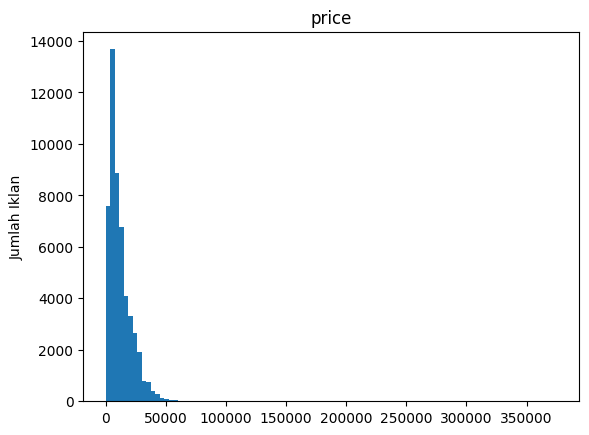

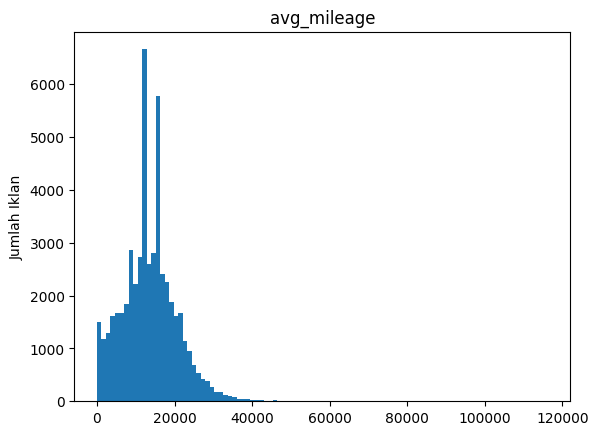

In [36]:
kuantitatif_column = ['price', 'avg_mileage']

for column in kuantitatif_column:
    # Create a figure and axis
    fig, ax = plt.subplots()

    # Plot a histogram for the column
    ax.hist(data_new[column], bins=100)

    # Set the x-axis and y-axis labels
    plt.xlabel('')
    plt.ylabel('Jumlah Iklan')
    plt.title(column)

    # Show the plot
    plt.show()

**Kesimpulan sementara:**

* Sebagian besar histogram nilainya mendekati nol. Berdasarkan histogram harga median, dapat disimpulkan bahwa ini adalah outlier. Nilai-nilai yang berada pada angka 0 ini bukanlah harga yang sebenarnya; melainkan adalah perhitungan yang salah — mereka mungkin mewakili para penjual yang mengambil harga murah untuk menarik pelanggan secara iklan dan bukan harga asli saat transaksi, atau semacamnya.

* Nilai yang mendekati nol pada kolom `avg_mileage` tidak menjadi masalah, karena mobil bisa memiliki odometer yang masih nol atau belum dipakai.


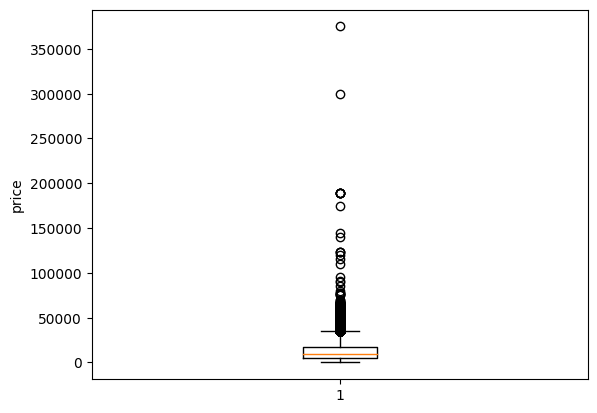

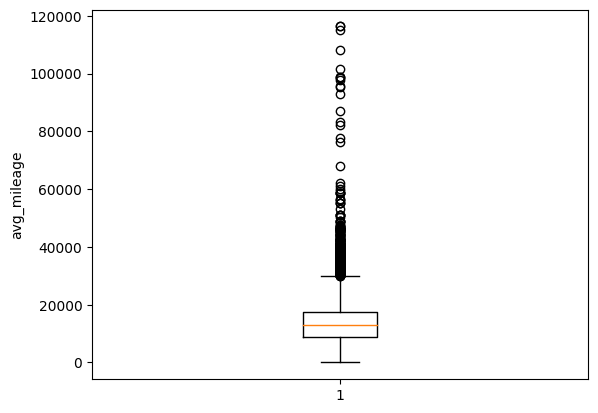

In [37]:
for column in kuantitatif_column:
    # Create a figure and axis
    fig, ax = plt.subplots()

    # Plot a boxplot for the column
    ax.boxplot(data_new[column])

    plt.xlabel('')
    plt.ylabel(column)

    # Show the plot
    plt.show()

In [38]:
# Calculating some statistical data
data_new[['price', 'avg_mileage']].describe()

,price,avg_mileage
count,51525.000000,51525.000000
mean,12132.464920,13530.689234
std,10040.803015,7104.243844
min,1.000000,0.000000
25%,5000.000000,8887.577705
50%,9000.000000,13026.688535
75%,16839.000000,17362.301421
max,375000.000000,116280.355340


**Kesimpulan sementara:**

Nilai rata-rata kolom `price` lebih tinggi dari mediannya yang berarti bahwa distribusinya banyak nilai yang tinggi, sehingga  menggeser nilai rata-rata ke atas tanpa memengaruhi mediannya.


Kolom `car_age`, `condition` dan `cylinders` memiliki variabel katagorik. Maka diagram batang dapat digunakan.

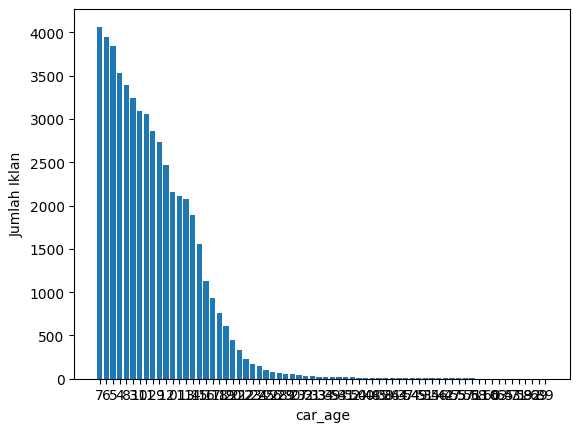

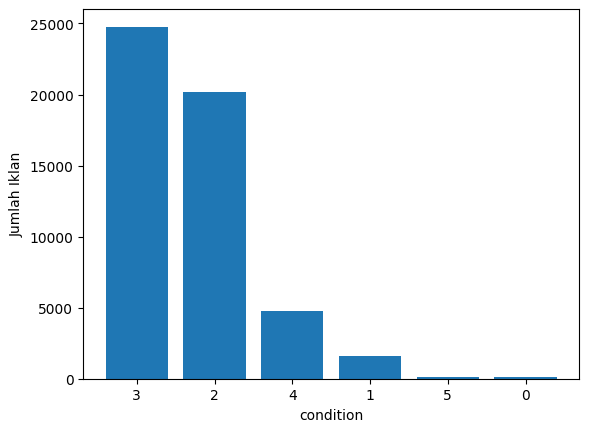

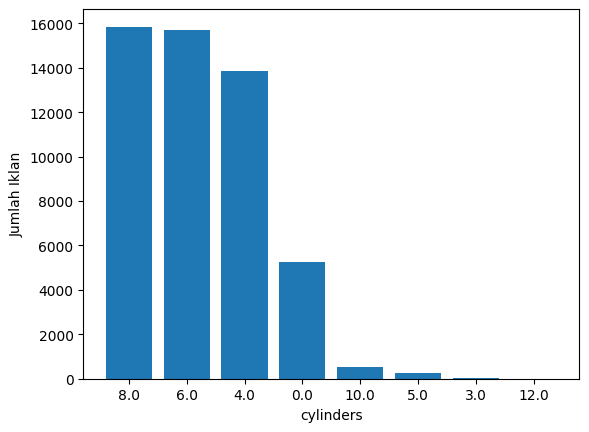

In [39]:
katagoris_column = ['car_age', 'condition', 'cylinders']

# Loop through the column names
for column in katagoris_column:
# Create a figure and axis
    fig, ax = plt.subplots()

    # Get the counts of each category in the column
    counts = data_new[column].value_counts()

    # Set the x-axis values
    x_pos = range(len(counts))

    # Plot a bar chart with the counts
    ax.bar(x_pos, counts)

    # Set the x-axis labels
    ax.set_xticks(x_pos)
    ax.set_xticklabels(counts.index)
    

    plt.xlabel(column)
    plt.ylabel('Jumlah Iklan')
    plt.show()

**Kesimpulan sementara:**

* Jumlah mobil yang paling banyak terjual yaitu berusia 7 tahun.
* Kondisi mobil yang paling banyak terjual yaitu 3 (excellent).
* Silinder mobil yang paling banya terjual yaitu 8.0.

### Kesimpulan

1. Jumlah mobil yang terjual yaitu 51525 dengan 100 model mobil. Data diambil dari 2018-05-01 hingga 2019-04-19. Sekitar 73 mobil terjual perharinya. Mobil paling populer terjual yaitu ford f-150 dengan total penjualan 2796 unit. Penjualan mobil paling banyak setiap hari Kamis.
2. Sekitar 7800 data mobil berada pada harga mendekati nol, beberapa mobil memiliki harga $1 Harga ini sepertinya salah, $1 terlalu murah untuk sebuah mobil. 
3. Dalam grafik diketahui terdapat outlier. Terdapat angka di sekitar $40000 hingga sekitar $360000.
4. Lebih dari 7000 unit mobil terjual memilii rata-rata jara tempuh seitar 13000 mile/year. Outlier berada di sekitar 21000 hingga sekitar 120000 mile/year.
5. Usia kendaran paling banyak terjual yaitu adalah 7 tahun. Beberapa mobil berusia sangat tua yaitu 110 tahun.
6. Mobil dengan kondisi 3 dan 2 paling banyak terjual. Namun tampa menarik ada beberapa mobil dengan kondisi 0.
7. Silinder mobil dengan nilai 8.0, 6.0, dan 4.0 silinder mesin paling banyak terjual. Silinder yang tidak diketahui dan di isi 0.0 cukup signifikan sekitar 5000 unit.

### 2.3. Mempelajari dan Menangani Outlier

Dengan hasil pembacaan beberapa parameter sebelumnya, kolom yang mungkin berisi *outlier* yaitu `price`, `avg_milage` dan `car_age`. Langkah selanjutnya dibuat DataFrame tanpa *outlier* tersebut. *Outlier* dapat diidentifikasi dengan menentukan batas bawah/atas untuk rentang nilai normal.

In [40]:
# Function for removing outlier, determine upper and lower whisker
def upper_lower_whisker(column):
    Q1  = data_new[column].quantile(0.25)
    Q3  = data_new[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_whisker = Q1 - 1.5*IQR
    upper_whisker = Q3 + 1.5*IQR
    return lower_whisker, upper_whisker

In [41]:
outlier_column = ['price', 'avg_mileage', 'car_age']

In [42]:
# Loop for applying the function
for column in outlier_column:
    lower, upper = upper_lower_whisker(column)
    print('Batas bawah outlier dari',column, lower)
    print('Batas atas outlier dari',column, upper)
    print('')
    

Batas bawah outlier dari price -12758.5
Batas atas outlier dari price 34597.5

Batas bawah outlier dari avg_mileage -3824.5078690796654
Batas atas outlier dari avg_mileage 30074.38699481853

Batas bawah outlier dari car_age -8.0
Batas atas outlier dari car_age 24.0



In [43]:
# Loop for cleaning the outlier
data_clean = data_new.copy()

for column in outlier_column:
    lower, upper = upper_lower_whisker(column)
    data_clean = data_clean[(data_clean[column] > lower) & (data_clean[column] < upper)]

Untuk membersihkan `price` mobil yang anomali, diperiksa terlebih dahulu persentase kesalahannya.

In [44]:
# Check the percentage of wrong price data
wrong_data_price = data_clean[data_clean['price'] < 100]

percentage_wrong_data_price = wrong_data_price['price'].count() / data_clean['price'].count()
print("Persentase data yang bermasalah pada kolom 'price' yaitu:{:.0%} dari keseluruhan data.".format(percentage_wrong_data_price))

Persentase data yang bermasalah pada kolom 'price' yaitu:2% dari keseluruhan data.


Karena hanya 2%, data bisa diiris.

In [45]:
# Slicing data
too_cheap = 100

data_clean = data_clean.query('price > @too_cheap')

In [46]:
# Check new dataset line after slicing
data_clean.shape[0]

47291

In [47]:
# Check new dataset line before slicing
data_new.shape[0]

51525

**Kesimpulan sementara:**

* Setelah outlier dihilangkan, data berubah dari 51525 menjadi 47291

Langkah selanjutnya membandingkan grafik dengan outlier dan tanpa outlier.

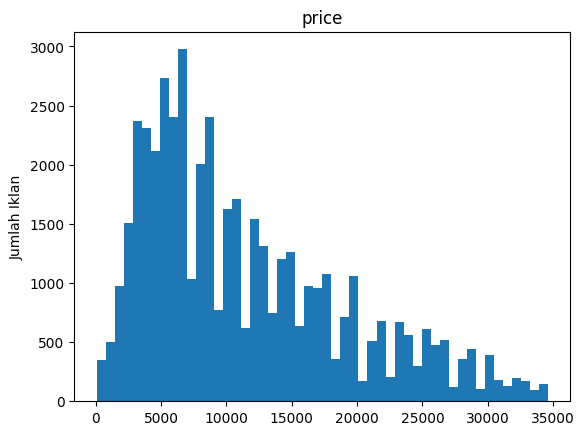

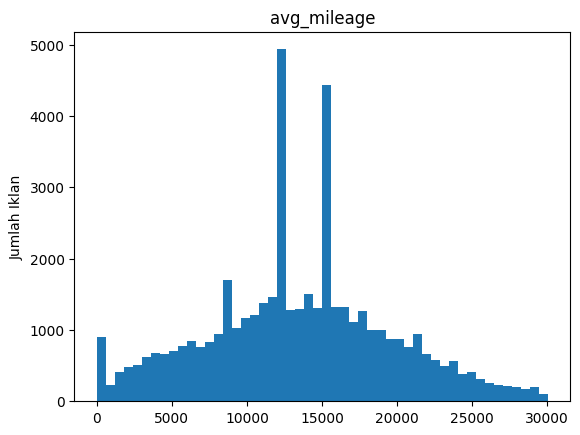

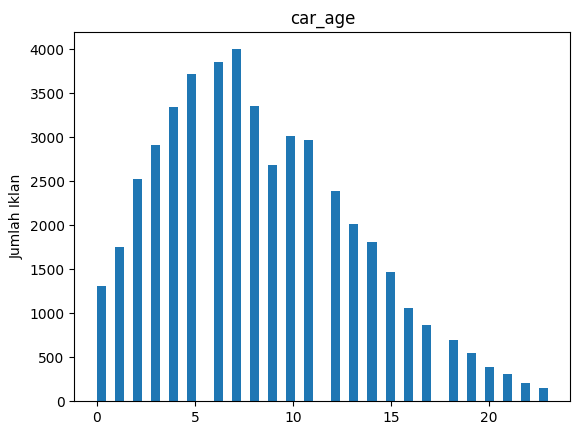

In [48]:
for column in outlier_column:
    # Create a figure and axis
    fig, ax = plt.subplots()

    # Plot a histogram for the column
    ax.hist(data_clean[column], bins=50)

    # Set the x-axis and y-axis labels
    plt.xlabel('')
    plt.ylabel('Jumlah Iklan')
    plt.title(column)

    # Show the plot
    plt.show()

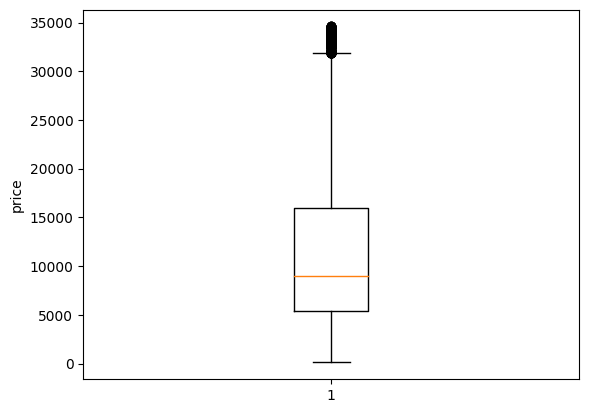

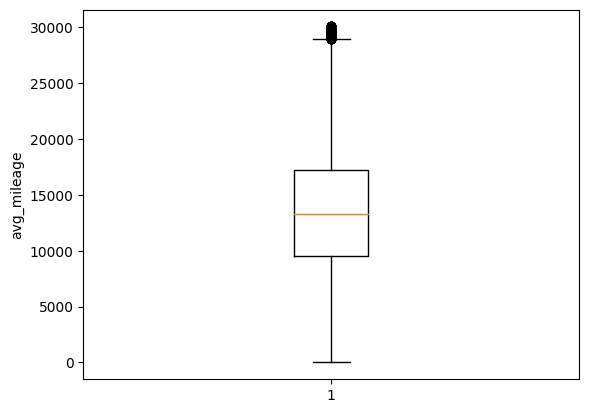

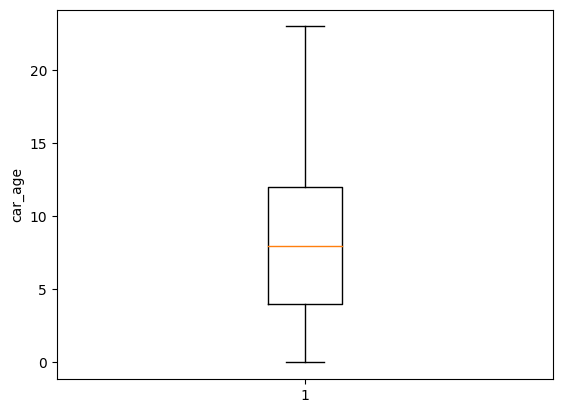

In [49]:
for column in outlier_column:
    # Create a figure and axis
    fig, ax = plt.subplots()

    # Plot a boxplot for the column
    ax.boxplot(data_clean[column])

    plt.xlabel('')
    plt.ylabel(column)

    # Show the plot
    plt.show()

In [50]:
# Check new dataset statistical data after slicing
data_clean.describe()

,price,model_year,condition,cylinders,odometer,is_4wd,days_listed,year,car_age,avg_mileage
count,47291.000000,47291.000000,47291.000000,47291.000000,47291.000000,47291.0,47291.000000,47291.000000,47291.000000,47291.000000
mean,11459.967943,2010.036540,2.631283,5.410755,114738.843575,1.0,39.547271,2018.306401,8.269861,13476.639901
std,7751.296309,4.937822,0.700507,2.391799,52639.558979,0.0,28.213205,0.461003,4.950758,6182.774367
min,105.000000,1995.000000,0.000000,0.000000,0.000000,1.0,0.000000,2018.000000,0.000000,0.000000
25%,5392.500000,2007.000000,2.000000,4.000000,80778.000000,1.0,19.000000,2018.000000,4.000000,9487.772266
50%,9000.000000,2011.000000,3.000000,6.000000,113000.000000,1.0,33.000000,2018.000000,8.000000,13272.404195
75%,15995.000000,2014.000000,3.000000,8.000000,147000.000000,1.0,53.000000,2019.000000,12.000000,17265.870944
max,34595.000000,2019.000000,5.000000,12.000000,256000.000000,1.0,271.000000,2019.000000,23.000000,30068.455522


In [51]:
# Check new dataset statistical data before slicing
data_new.describe()

,price,model_year,condition,cylinders,odometer,is_4wd,days_listed,year,car_age,avg_mileage
count,51525.000000,51525.000000,51525.000000,51525.000000,51525.000000,51525.0,51525.00000,51525.000000,51525.000000,51525.000000
mean,12132.464920,2009.793557,2.637535,5.499932,115199.014508,1.0,39.55476,2018.307462,8.513906,13530.689234
std,10040.803015,6.099381,0.712447,2.431985,60484.863376,0.0,28.20427,0.461447,6.112976,7104.243844
min,1.000000,1908.000000,0.000000,0.000000,0.000000,1.0,0.00000,2018.000000,0.000000,0.000000
25%,5000.000000,2007.000000,2.000000,4.000000,75668.000000,1.0,19.00000,2018.000000,4.000000,8887.577705
50%,9000.000000,2011.000000,3.000000,6.000000,110908.000000,1.0,33.00000,2018.000000,8.000000,13026.688535
75%,16839.000000,2014.000000,3.000000,8.000000,147821.000000,1.0,53.00000,2019.000000,12.000000,17362.301421
max,375000.000000,2019.000000,5.000000,12.000000,990000.000000,1.0,271.00000,2019.000000,110.000000,116280.355340


Data sudah terlihat lebih rapih tanpa outlier.

### 2.4. Masa Berlaku Iklan 

In [52]:
# Check statisctial info about days_listed
data_clean['days_listed'].describe()

count    47291.000000
mean        39.547271
std         28.213205
min          0.000000
25%         19.000000
50%         33.000000
75%         53.000000
max        271.000000
Name: days_listed, dtype: float64

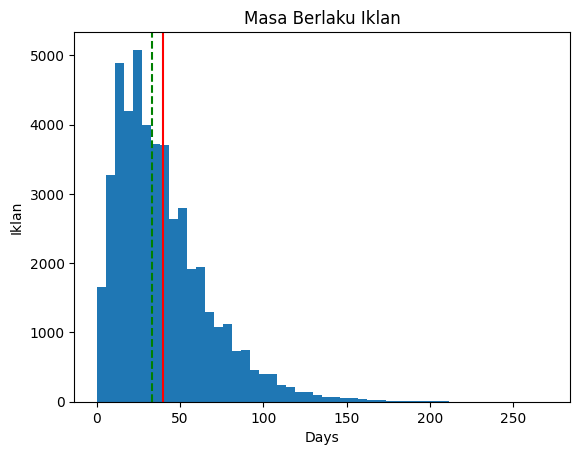

In [53]:
days_mean = data_clean['days_listed'].mean()
days_median = data_clean['days_listed'].median()

fig, ax = plt.subplots()

# plot histogram using the 'days_listed' column of the 'data_clean' DataFrame
ax.hist(data_clean['days_listed'], bins=50)
ax.axvline(days_mean, color='red', linestyle='-', label='Mean')
ax.axvline(days_median, color='green', linestyle='--', label='Median')

ax.set_xlabel('Days')
ax.set_ylabel('Iklan')
ax.set_title('Masa Berlaku Iklan')

plt.show()


<AxesSubplot: >

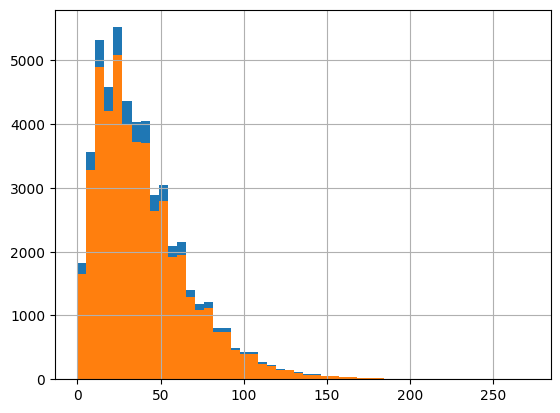

In [54]:
# Compare old and new dataset
data_new['days_listed'].hist(bins=50)
data_clean['days_listed'].hist(bins=50)

Iklan ditayangkan dari 0-271 hari. Hari iklan dihapus paling banyak sebelum 50 hari. Rata-rata iklan ditayangkan sebelum dihapus hingga 40 hari. Median iklan ditayangan sebelum dihapus hingga 33 hari. Iklan paling lama ditayangkan hingga 271 hari, sedangkan paling cepat yaitu 0 hari (di hari yang sama langsung dihapus/terjual)

### 2.5. Harga Rata-Rata Setiap Jenis Kendaraan

In [55]:
# Pivot table about avg car price
avg_car_price = data_clean.pivot_table(values='price', 
                                       index='type',
                                       aggfunc=['mean', 'count'])
avg_car_price.columns = ['avg_price', 'total_ads']
print(avg_car_price.sort_values('total_ads', ascending=False))
print(avg_car_price.sort_values('avg_price', ascending=False))

                avg_price  total_ads
type                                
sedan         7085.369885      11828
SUV          10717.145654      11596
truck        15599.675600      10746
pickup       15151.824077       6230
coupe        14073.936434       1935
wagon         8996.340667       1500
mini-van      8086.358209       1139
hatchback     6918.012085        993
van           9158.707665        561
convertible  13481.421212        330
other        10587.573276        232
offroad      14503.261111        180
bus          18107.428571         21
                avg_price  total_ads
type                                
bus          18107.428571         21
truck        15599.675600      10746
pickup       15151.824077       6230
offroad      14503.261111        180
coupe        14073.936434       1935
convertible  13481.421212        330
SUV          10717.145654      11596
other        10587.573276        232
van           9158.707665        561
wagon         8996.340667       1500
m

<AxesSubplot: xlabel='type'>

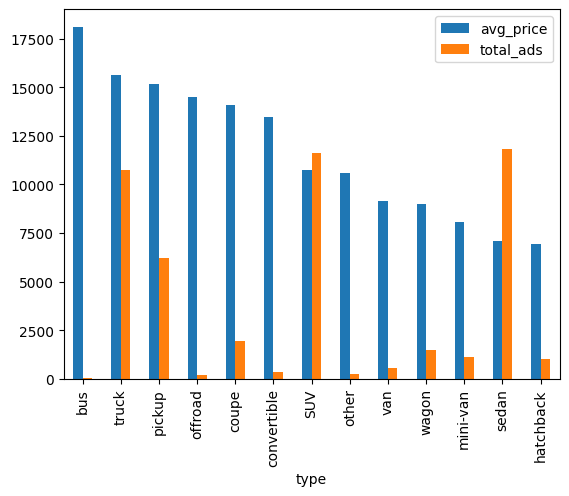

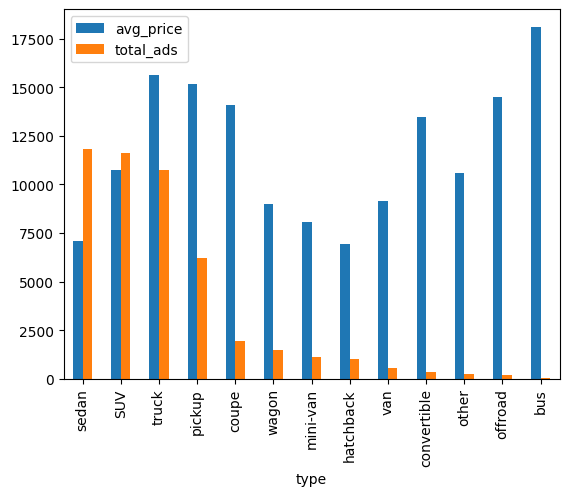

In [56]:
# Sorted version with bar chart
sorted_avg_car_price = avg_car_price.sort_values('avg_price', ascending=False)
sorted_avg_car_price_ads = avg_car_price.sort_values('total_ads', ascending=False)

sorted_avg_car_price.plot(kind='bar')
sorted_avg_car_price_ads.plot(kind='bar')

**Kesimpulan**

Iklan terbanyak dalam data yaitu mobil dengan tipe sedan dan SUV. Harga mobil termahal yang dijual yaitu mobil tipe bus dan truck.

### 2.6. Faktor Harga

Mobil tipe sedan dan SUV dianalisis untuk mengetahui korelasinya terhadap usia, jarak tempuh, kondisi, tipe transisi, dan warnanya. Analisis ini akan menjawab hipotesis awal. Tipe mobil tersebut dipilih karena merupakan jenis kendaraan yang paling populer.

In [57]:
# Query sedan
sedan_type = data_clean.query('type in ("sedan")')
print(sedan_type.value_counts())

price  model_year  model             condition  cylinders  fuel  odometer  transmission  type   paint_color  is_4wd  date_posted  days_listed  day_of_week  month      year  car_age  avg_mileage 
105    2011        chrysler 300      3          6.0        gas   70000.0   automatic     sedan  unknown      1.0     2018-07-11   100          Wednesday    July       2018  7        8221.843307     1
7995   2013        nissan altima     3          4.0        gas   92280.0   automatic     sedan  white        1.0     2018-09-01   49           Saturday     September  2018  5        10838.738576    1
                   hyundai elantra   3          4.0        gas   66000.0   automatic     sedan  white        1.0     2018-05-31   37           Thursday     May        2018  5        7752.023689     1
                                                                 93781.0   automatic     sedan  unknown      1.0     2019-02-22   60           Friday       February   2019  6        11015.038388    1
     

In [58]:
# Loop for check value counts
for col in ['car_age', 'avg_mileage', 'condition']:
    print(sedan_type[col].value_counts())
    print()

6     1313
5     1172
4      971
7      921
8      815
9      805
3      738
2      699
10     687
11     687
12     561
1      518
13     415
0      315
14     314
15     269
16     197
17     145
18     103
19      74
20      47
21      27
22      20
23      15
Name: car_age, dtype: int64

12242.324684    927
15151.682665    702
8572.152559     217
15269.137570     61
0.000000         60
               ... 
29628.234541      1
19729.017744      1
16619.516606      1
18168.981704      1
16393.533370      1
Name: avg_mileage, Length: 4829, dtype: int64

3    5938
2    4239
4    1304
1     260
5      46
0      41
Name: condition, dtype: int64



**Kesimpulan sementara:**

* Mobil sedan dengan usia 6 dan 5 tahun cukup diminati karena terjual paling banyak.
* Mobil sedan dengan rata-rata jarak tempuh paling diminati yaitu 12242.324684 mile/year dan 15151.682665 mile/year.
* Kondisi mobil sedan good(3) dan fair(2) paling diminati oleh pembeli.

<AxesSubplot: xlabel='price', ylabel='car_age'>

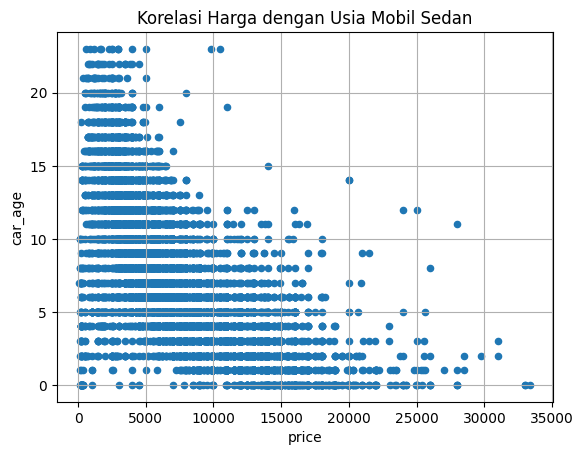

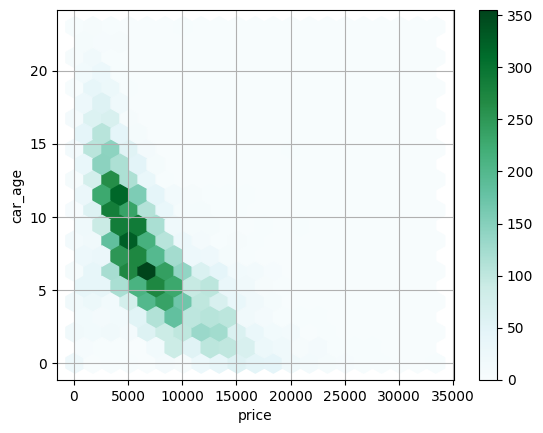

In [59]:
# Scater plot and hexbin plot
sedan_type.plot(x='price', y='car_age', kind='scatter', grid=True, title='Korelasi Harga dengan Usia Mobil Sedan')
sedan_type.plot(x='price', y='car_age', kind='hexbin', gridsize=20, sharex=False, grid=True) 

<AxesSubplot: xlabel='price', ylabel='avg_mileage'>

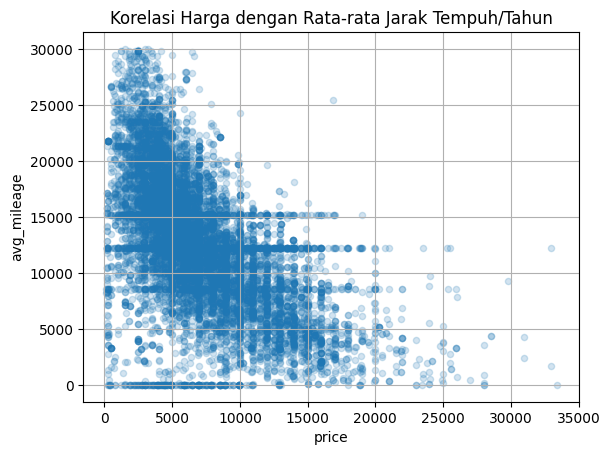

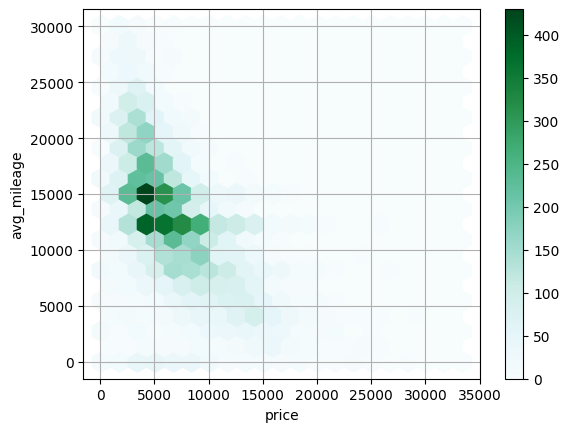

In [60]:
# Scater plot and hexbin plot
sedan_type.plot(x='price', y='avg_mileage', kind='scatter', alpha=0.2, grid=True, title='Korelasi Harga dengan Rata-rata Jarak Tempuh/Tahun')
sedan_type.plot(x='price', y='avg_mileage', kind='hexbin', gridsize=20, sharex=False, grid=True) 

<AxesSubplot: xlabel='price', ylabel='condition'>

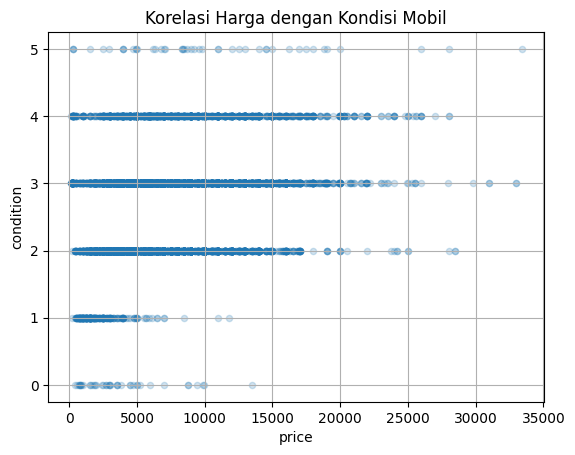

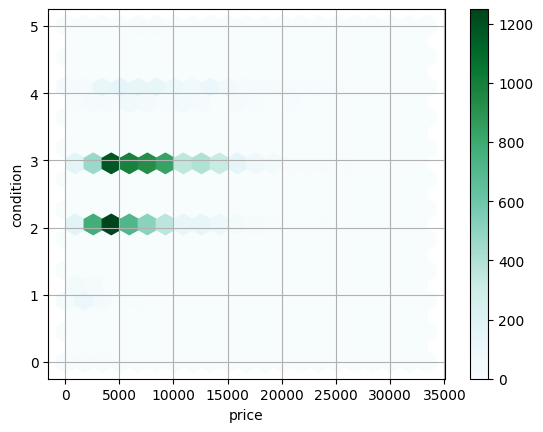

In [61]:
# Scater plot and hexbin plot
sedan_type.plot(x='price', y='condition', kind='scatter', alpha=0.2, grid=True, title='Korelasi Harga dengan Kondisi Mobil')
sedan_type.plot(x='price', y='condition', kind='hexbin', gridsize=20, sharex=False, grid=True) 

In [62]:
# Check correlation
print(sedan_type['price'].corr(sedan_type['car_age']))
print(sedan_type['price'].corr(sedan_type['avg_mileage']))
print(sedan_type['price'].corr(sedan_type['condition']))

-0.662180049999189
-0.5665877707713808
0.307745300800969


**Kesimpulan**

* Pada plot tersebut menjelaskan bahwa usia mobil semakin tua maka semakin murah harga mobil. Begitupun sebaliknya apabila usia mobil semakin muda maka semakin mahal harga mobil, namun mobil yang berusia muda lebih diminati daripada mobil berusia tua. Terlihat sekitar 3 - 12 tahun dengan harga $3000 - $10000
* Plot korelasi harga dengan rata-rata jarak tempuh, menjelaskan bahwa semakin kecil jarak tempuh maka harga mobil semakin mahal, dan jarak tempuh semakin jauh, harga semakin murah. rata-rata jarak tempuh pertahun penjualan tertinggi sekitar 15000 mile/year dengan harga $4500
* Plot korelasi harga dengan kondisi mobil menjelaskan bahwa harga semakin tinggi maka kondisi mobil semakin baik. Untuk tipe sedan, paling banyak peminat yaitu pada kondisi 3 dan 2 dengan harga sekitar $4000.
* Hubungan korelasi antara harga dengan usia mobil serta rata-rata jarak pertahun memiliki korelasi negatif, artinya saling berlawanan Namun memiliki korelasi yang kuat antara kedua variabel. Sedangkan korelasi antara harga dengan kondisi mobil memiliki korelasi positif, artinya saling berhubungan namun hasil mendekati 0 artinya hampir/sama sekali tidak ada korelasi antara keduanya.


In [63]:
# Loop for check value counts
for col in ['transmission', 'paint_color']:
    print(sedan_type[col].value_counts())
    print()

automatic    11189
manual         565
other           74
Name: transmission, dtype: int64

unknown    2121
silver     2024
black      1739
grey       1604
white      1450
blue       1206
red         912
custom      267
brown       251
green       201
purple       23
yellow       21
orange        9
Name: paint_color, dtype: int64



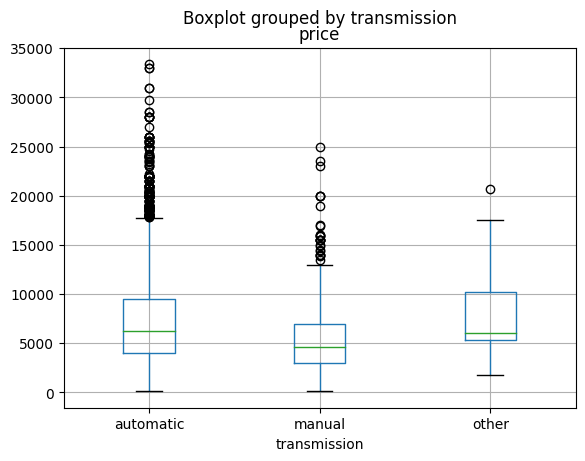

In [64]:
# Create a boxplot
sedan_type.boxplot(column='price', by='transmission')

# Set grid
plt.grid(True)

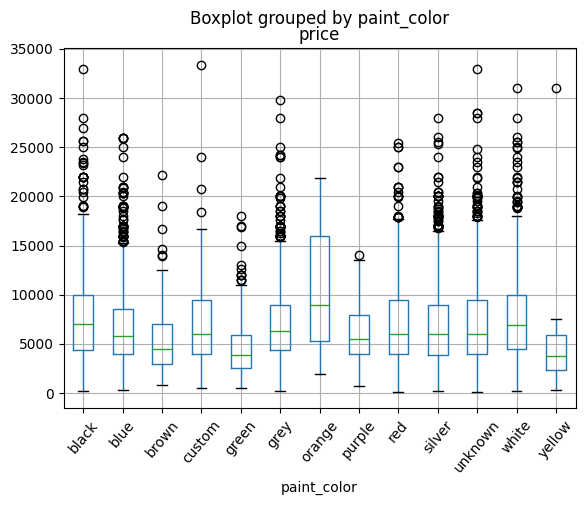

In [65]:
# Create a boxplot
sedan_type.boxplot(column='price', by='paint_color')

plt.xticks(rotation=50)
plt.grid(True)

**Kesimpulan sementara:**

* Mobil sedan dengan tipe transisi matic paling populer.
* Mobil sedan dengan warna tidak diketahui cukup diminati karena terjual paling banyak. Namun mobil berwarna silver dan hitam juga diminati.
* Tabel boxplot terlihat sejajar sehingga tipe transmisi dan warna mobil tidak memengaruhi harga (tida ada korelasi)

In [66]:
# Query SUV
suv_type = data_clean.query('type in ("SUV")')
print(suv_type.value_counts())

price  model_year  model                condition  cylinders  fuel  odometer  transmission  type  paint_color  is_4wd  date_posted  days_listed  day_of_week  month      year  car_age  avg_mileage 
179    2013        ford edge            3          4.0        gas   122000.0  automatic     SUV   grey         1.0     2019-01-06   52           Sunday       January    2019  6        14329.498335    1
12509  2013        chevrolet equinox    4          4.0        gas   12430.0   automatic     SUV   blue         1.0     2018-08-03   20           Friday       August     2018  5        1459.964461     1
12595  2012        gmc acadia           2          0.0        gas   113487.0  automatic     SUV   silver       1.0     2018-11-04   78           Sunday       November   2018  6        13329.604734    1
                                                   6.0        gas   113487.0  automatic     SUV   silver       1.0     2019-03-25   21           Monday       March      2019  7        13329.604734 

In [67]:
# Loop for check value counts
for col in ['car_age', 'avg_mileage', 'condition']:
    print(suv_type[col].value_counts())
    print()

7     975
11    912
6     886
10    872
8     845
5     814
9     775
4     758
3     641
12    564
2     500
14    477
13    462
15    422
1     408
16    298
0     251
17    198
18    161
19    131
20    101
21     65
22     50
23     30
Name: car_age, dtype: int64

12242.324684    948
15151.682665    660
8572.152559     163
21331.337550     50
21729.157311     48
               ... 
12544.183788      1
23591.874640      1
14756.916732      1
15301.085304      1
13047.830418      1
Name: avg_mileage, Length: 4907, dtype: int64

3    6063
2    4156
4    1071
1     274
0      17
5      15
Name: condition, dtype: int64



**Kesimpulan sementara:**

* Mobil SUV dengan usia 7 dan 11 tahun cukup diminati karena terjual paling banyak.
* Mobil SUV dengan rata-rata jarak tempuh paling diminati yaitu 12242.324684 mile/year dan 15151.682665 mile/year.
* Kondisi mobil SUV good(3) dan fair(2) paling diminati oleh pembeli.

<AxesSubplot: xlabel='price', ylabel='car_age'>

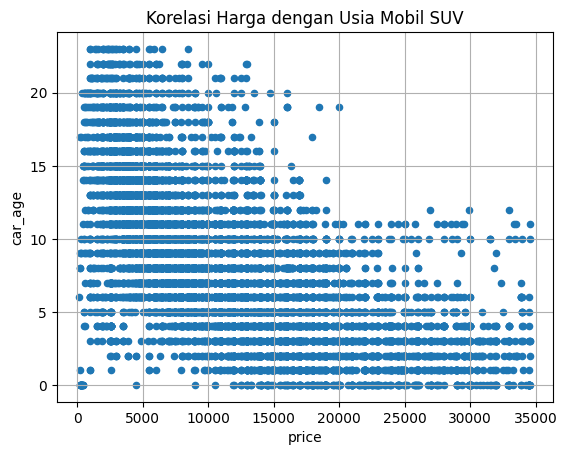

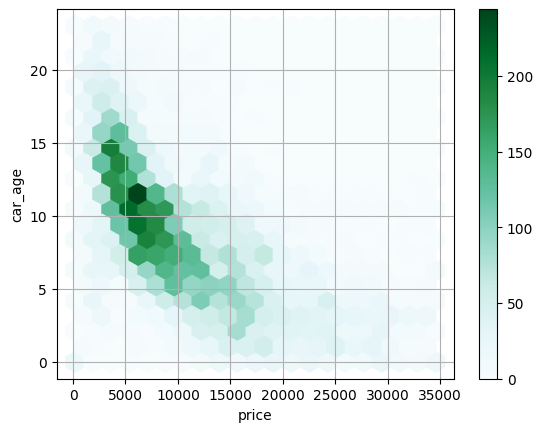

In [68]:
# Scater plot and hexbin plot
suv_type.plot(x='price', y='car_age', kind='scatter', grid=True, title='Korelasi Harga dengan Usia Mobil SUV')
suv_type.plot(x='price', y='car_age', kind='hexbin', gridsize=20, sharex=False, grid=True) 

<AxesSubplot: xlabel='price', ylabel='avg_mileage'>

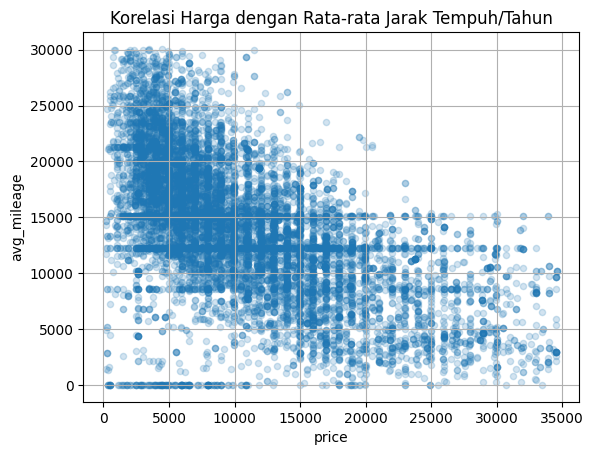

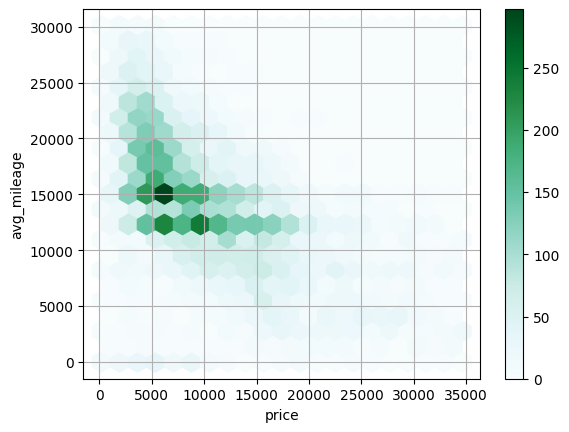

In [69]:
# Scater plot and hexbin plot
suv_type.plot(x='price', y='avg_mileage', kind='scatter', alpha=0.2, grid=True, title='Korelasi Harga dengan Rata-rata Jarak Tempuh/Tahun')
suv_type.plot(x='price', y='avg_mileage', kind='hexbin', gridsize=20, sharex=False, grid=True) 

<AxesSubplot: xlabel='price', ylabel='condition'>

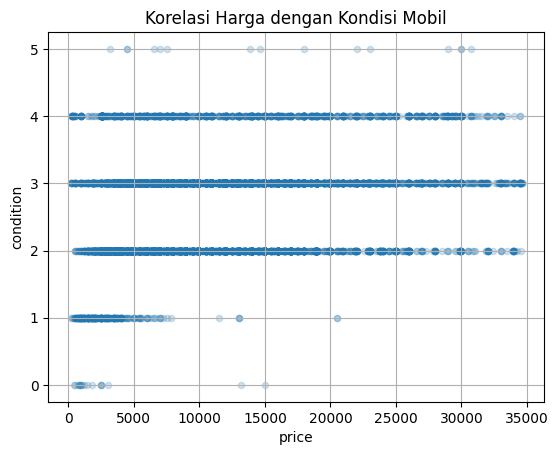

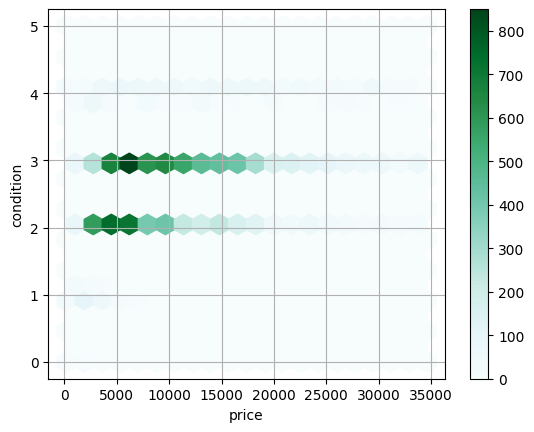

In [70]:
# Scater plot and hexbin plot
suv_type.plot(x='price', y='condition', kind='scatter', alpha=0.2, grid=True, title='Korelasi Harga dengan Kondisi Mobil')
suv_type.plot(x='price', y='condition', kind='hexbin', gridsize=20, sharex=False, grid=True) 

In [71]:
# Check correlation
print(suv_type['price'].corr(suv_type['car_age']))
print(suv_type['price'].corr(suv_type['avg_mileage']))
print(suv_type['price'].corr(suv_type['condition']))

-0.6427585546119771
-0.5619034467659
0.28622395433330544


**Kesimpulan**

* Pada plot tersebut menjelaskan bahwa usia mobil semakin tua maka semakin murah harga mobil. Begitupun sebaliknya apabila usia mobil semakin muda maka semakin mahal harga mobil, namun mobil yang berusia muda lebih diminati daripada mobil berusia tua. Terlihat sekitar 4 - 17 tahun dengan harga $2000 - $15000
* Plot korelasi harga dengan rata-rata jarak tempuh, menjelaskan bahwa semakin kecil jarak tempuh maka harga mobil semakin mahal, dan jarak tempuh semakin jauh, harga semakin murah. rata-rata jarak tempuh pertahun penjualan tertinggi sekitar 15000 mile/year dengan harga $6500
* Plot korelasi harga dengan kondisi mobil menjelaskan bahwa harga semakin tinggi maka kondisi mobil semakin baik. Untuk tipe SUV, paling banyak peminat yaitu pada kondisi 3 dan 2 dengan harga sekitar $3000 - $18000.
* Hubungan korelasi antara harga dengan usia mobil serta rata-rata jarak pertahun memiliki korelasi negatif, artinya saling berlawanan Namun memiliki korelasi yang kuat antara kedua variabel. Sedangkan korelasi antara harga dengan kondisi mobil memiliki korelasi positif, artinya saling berhubungan namun hasil mendekati 0 artinya hampir/sama sekali tidak ada korelasi antara keduanya.
 

In [72]:
for col in ['transmission', 'paint_color']:
    print(suv_type[col].value_counts())
    print()

automatic    11048
manual         456
other           92
Name: transmission, dtype: int64

unknown    2080
black      2017
white      1835
silver     1497
grey       1129
blue        987
red         857
green       407
brown       350
custom      273
orange       81
yellow       45
purple       38
Name: paint_color, dtype: int64



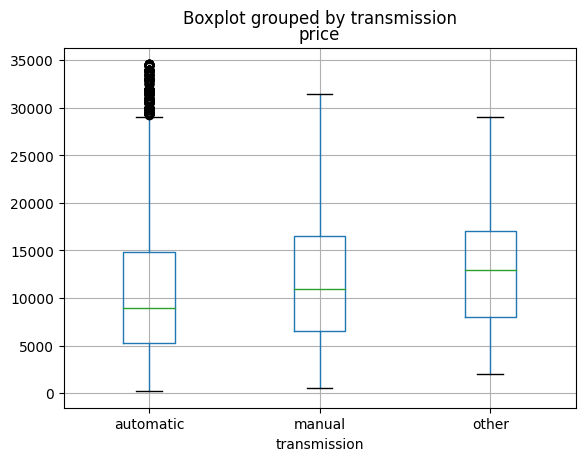

In [73]:
# Create a boxplot
suv_type.boxplot(column='price', by='transmission')

# Set the grid
plt.grid(True)


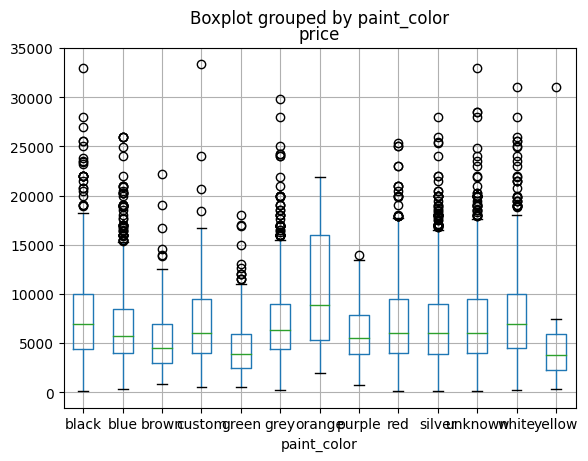

In [74]:
# Create a boxplot
sedan_type.boxplot(column='price', by='paint_color')

# Set the grid
plt.grid(True)


**Kesimpulan sementara:**

* Mobil sedan dengan tipe transisi matic paling populer.
* Mobil sedan dengan warna tidak diketahui cukup diminati karena terjual paling banyak. Namun mobil berwarna hitam dan putih juga diminati.
* Tabel boxplot terlihat sejajar sehingga tipe transmisi dan warna mobil tidak memengaruhi harga (tida ada korelasi)

## Kesimpulan Umum

#### A. Pra-pemrosesan

Dari eksplorasi pra-pemrosesan data, dapat disimpulkan bahwa:
1. Ukuran dataset sebanyak 51525 baris dengan 13 kolom. Terdapat 5 kolom dengan missing value yaitu model_year, cylinders, odometer, paint_color, dan is_4wd.
2. Duplikat tidak ditemukan dalam dataset.
3. Dataset yang memiliki nilai-nilai yang hilang, diperiksa persentase, tipe, dan polanya, diisi dengan variabel tertentu dan median data, diperbaiki tipe data dan kualitas data, serta ditambahkan beberapa kolom.

#### B. Analisis Data Esksploratif (EDA)

Dari hasil analisis data esksploratif, dapat disimpulkan bahwa:
1. Parameter price, car_age, avg_mileage, conditon, dan cylinders dipelajari untuk mengetahui keakuratan data.
2. Tedapat outlier pada kolom price, avg_mileage, dan car_age, dataset dibuat baru tanpa outlier dengan jumlah baris sebanyak 47291.
3. Waktu iklan ditayangkan dengan rentang 0 - 271 hari.
4. Tipe mobil yang paling populer adalah sedan dan SUV.
5. Hubungan antara usia mobil dan rata-rata jarak per tahun dengan harga ditinjau dari data sedan dan SUV menjelaskan bahwa hubungan tersebut memiliki korelasi yang kuat antara kedua variabel. 
6. Hubungan antara kondisi, tipe transmisi, dan warna mobil dengan harga ditinjau dari data sedan dan SUV menjelasan bahwa hubungan tersebut hampir/sama sekali tidak ada korelasi antara keduanya.